In [1]:
import tweepy
from twython import Twython

consumer_key = input('consumer_key')
consumer_secret = input('consumer_secret')
access_token = input('access_token')
access_secret = input('access_secret')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

consumer_key


KeyboardInterrupt: 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
import urllib.request

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urllib.request.urlretrieve(url, 'image_predictions.tsv')

In [18]:
tweet_data = pd.read_csv('twitter-archive-enhanced.csv')
images = pd.read_csv('image_predictions.tsv', sep = '\t')


In [120]:
tweet_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [121]:
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


twitter = Twython(consumer_key, consumer_secret, access_token , access_secret)

def get_tweet_data(tweet_id):
    try:
        tweet = twitter.show_status(id=tweet_id)
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
    except:
        print(tweet_id)
        favorite_count = 0
        retweet_count = 0
    return favorite_count, retweet_count
data = tweet_data['tweet_id'].apply(lambda x: get_tweet_data(x))


favorite_count = list(data[i][0] for i in range(len(data)))
retweet_count = list(data[i][1] for i in range(len(data)))

In [ ]:
favorite_count = []
retweet_count = []
for ids in tweet_data['tweet_id']:
    try:
        tweet = twitter.show_status(id=ids)
        favorite_count.append(tweet['favorite_count'])
        retweet_count.append(tweet['retweet_count'])
    except Exception as e:
        if str(e) in "Twitter API returned a 429 (Too Many Requests), Rate limit exceeded" :
            idx = tweet_data[tweet_data['tweet_id']==ids].index
            break
        else:
            print(e)
            favorite_count.append(0)
            retweet_count.append(0)
idx

In [ ]:
for ids in tweet_data['tweet_id'][idx:]:
    try:
        tweet = twitter.show_status(id=ids)
        favorite_count.append(tweet['favorite_count'])
        retweet_count.append(tweet['retweet_count'])
    except Exception as e:
        if str(e) in "Twitter API returned a 429 (Too Many Requests), Rate limit exceeded" :
            print('STOP!!!',e)
            idx = tweet_data[tweet_data['tweet_id'] == ids].index[0]
            break
        else:
            print(e)
            favorite_count.append(0)
            retweet_count.append(0)
    idx = "finished"
idx

In [ ]:
tweet_json = pd.DataFrame()
tweet_json['tweet_id'] = tweet_data['tweet_id']
tweet_json['favorite_count'] = favorite_count
tweet_json['retweet_count'] = retweet_count
tweet_json.to_csv('tweet_json.csv')

In [ ]:
json = tweet_json.to_json() 
with open('tweet_json.txt', 'w') as f:
    f.write(json)

In [187]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35945,7635
1,892177421306343426,31025,5647
2,891815181378084864,23343,3741
3,891689557279858688,39233,7809
4,891327558926688256,37478,8401


# Assess

In [189]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- `doggo`, `floofer`, `pupper` and `puppo` don't have null-value is because that they are recorded as string, None. 

- `in_reply_to_status_id` and `in_reply_to_user_id` means the Tweet is a reply so it's fine with null-value when it's not a reply.

- `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` means the Tweet is a reply so it's fine with null-value when it's not a retweet.

- `expanded_urls` has some null-values and I will see if there is some shared attributes between these rows. However, I cannot see any shared-points by the below table.

In [191]:
tweet_data[tweet_data['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [193]:
tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- `rating_denominator` should all be '10'
- `rating_numerator` might not be '0'. I will take a look about what's going on in those rows.

In [194]:
tweet_data.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


- There are only two rows with 0 `rating_numerator`. Therefore, I go to the tweet page directly and see they are truly 0 as the picture is unclear or not a dog picture. I will remove these two rows later avoiding the score having impacts to our statistics results.

In [230]:
# See if there are duplicated rows
tweet_data[tweet_data.duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [233]:
# See if there are duplicated tweet_id
max(tweet_data['tweet_id'].value_counts())  

1

In [197]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [199]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [198]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [202]:
print(len(images.query('p1_dog == False | p2_dog == False | p3_dog == False')))
images.query('p1_dog == False | p2_dog == False | p3_dog == False')

832


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False


- I choose to see those rows with False in `p1_dog`, `p2_dog` or `p3_dog`. However, there are more than 800 rows. It's not practical to open each url to check if they are dogs. Therefore, I will take three falses as non-dog, if the sum of these three variables are large enough.
- Then I will check if some of them having one true below.

In [212]:
df = images.query('p1_dog == False | p2_dog == False | p3_dog == False')
print(len(df.query('p1_dog == True & p2_dog == False & p3_dog == False')))
df.query('p1_dog == True & p2_dog == False & p3_dog == False').sort_values(by = 'p1_conf').head(10)

43


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
1473,780192070812196864,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,1,vizsla,0.144012,True,mongoose,0.091474,False,hatchet,0.073545,False
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
717,685663452032069632,https://pbs.twimg.com/ext_tw_video_thumb/68566...,1,Chesapeake_Bay_retriever,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False
422,674051556661161984,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed_sloth,0.132154,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,kelpie,0.218408,True,Arabian_camel,0.114368,False,coyote,0.096409,False
926,702598099714314240,https://pbs.twimg.com/media/CcAhPevW8AAoknv.jpg,1,kelpie,0.219179,True,badger,0.133584,False,Siamese_cat,0.074440,False


- First, I take those rows whose `p1_dog` is True and then sort by p1_conf. I only check 10 with least p1_conf as they have higher probabilities not a dog. It turns out they are all dog, so I will keep those rows with `p1_dog` True.

In [213]:
df = images.query('p1_dog == False | p2_dog == False | p3_dog == False')
print(len(df.query('p1_dog == False & p2_dog == True & p3_dog == False')))
df.query('p1_dog == False & p2_dog == True & p3_dog == False').sort_values(by = 'p2_conf').head(10)

54


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False


In [218]:
print(len(df.query('p1_dog == False & p2_dog == False & p3_dog == True')))
df.query('p1_dog == False & p2_dog == False & p3_dog == True').sort_values(by = 'p3_conf').head(20)

64


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
513,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,0.000216,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True


- In conclusion, those rows have only `p2_dog` true might be recognized as other animals in `p1`. Thus, I decide to remove those rows. In the opposite, those rows have only `p3_dog` true are usually recognized as other stuffs in `p1`/`p2` but they are actually dogs.

In [222]:
print(len(df.query('p1_dog == False & p2_dog == True & p3_dog == True')))
df.query('p1_dog == False & p2_dog == True & p3_dog == True').sort_values(by = 'p2_conf').head(10)

101


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True
1151,732375214819057664,https://pbs.twimg.com/media/CinrX2EWkAABDYt.jpg,1,tennis_ball,0.998673,False,basset,0.000547,True,golden_retriever,0.000360,True
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat_belt,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True
1484,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,Chesapeake_Bay_retriever,0.003523,True,Labrador_retriever,0.000921,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True


- In conclusion, those rows with both `p2_dog` and `p3_dog` true have high probabilities are actually dogs and are recognized as other stuffs in `p1`.

In [227]:
print(len(df.query('p1_dog == False & p2_dog == False & p3_dog == False')))
df.query('p1_dog == False & p2_dog == False & p3_dog == False').sort_values(by = 'p1_conf').head(20)

324


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,0.038299,False,bathtub,0.035528,False
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False


- In conclusion, if they are all false in the three `p_dog`s then they might be probabilty not dogs.

#### Quality
##### `tweet_data` table
- `expanded_urls` has duplicated in one cell
- `rating_denominator` having 0 value should be equal to 10.
- `rating_denominator` with 2 should be 9/10
- Remove two rows with unclear or non-dog pictures whose `rating_numerator` are 0.
- As we only want the original tweet, I will remove those `retweets`.
- We don't have image data for tweets after Aug 1st 2017 so I will remove tweets after that time. 
- `in_reply_to_status_id` and `in_reply_to_user_id` should be `int` instead of float.
- `timestamp` should be datetime format.

##### `images` table
- Add one column to judge if the picture has a dog.

#### Tidiness
##### `tweet_data` table
- Melt `doggo`, `floofer`, `pupper` and `puppo` into one column.
- Remove `retweets` columns

##### `images` table
- 


##### `tweet_json` table
- Merge tweet_json with tweet_data as we get the tweet_json data by `tweet_id` in tweet_data

# Clean

In [52]:
tweet_data_clean = tweet_data.copy()
images_clean = images.copy()

##### Define
`expanded_urls` has duplicated in one cell. Use `,` to seperate urls and take the first url

##### Code

In [53]:
tweet_data_clean['expanded_urls']= [tweet_data_clean['expanded_urls'].str.split(',').fillna('-')[i][0] for i in range(len(tweet_data_clean))]
tweet_data_clean['expanded_urls'].replace('-', np.nan, inplace = True)

##### Test

In [54]:
tweet_data_clean['expanded_urls'][4]

'https://twitter.com/dog_rates/status/891327558926688256/photo/1'

##### Define
Change `rating_denominator` == 0 to be 10

##### Code

In [55]:
tweet_data_clean.loc[tweet_data_clean['rating_denominator'] == 0,['rating_denominator']] = 10

##### Test

In [56]:
tweet_data_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.459677
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.741801
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,2.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Define
`rating_denominator` with 2 should be 9/10  tweet_id = 666287406224695296	

##### Code

In [57]:
tweet_data_clean.loc[tweet_data_clean['tweet_id'] == 666287406224695296, 'rating_numerator']=9
tweet_data_clean.loc[tweet_data_clean['tweet_id'] == 666287406224695296, 'rating_denominator']=10

##### Test

In [58]:
tweet_data_clean[tweet_data_clean['tweet_id'] ==666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


##### Define
Remove two rows with unclear or non-dog pictures whose `rating_numerator` are 0.

##### Code

In [59]:
tweet_data_clean.drop(tweet_data_clean.query('rating_numerator == 0').index, axis = 0, inplace = True)

##### Test

In [60]:
tweet_data_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.354000e+03,7.700000e+01,7.700000e+01,1.810000e+02,1.810000e+02,2354.000000,2354.000000
mean,7.427306e+17,7.454900e+17,2.040329e+16,7.720400e+17,1.241698e+16,13.141037,10.463466
std,6.856967e+16,7.632197e+16,1.260797e+17,6.236928e+16,9.599254e+16,45.893941,6.742402
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,1.000000,7.000000
25%,6.783975e+17,6.757073e+17,2.918590e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.194596e+17,7.032559e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993058e+17,8.265984e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Define
Remove those `retweets`.

##### Code

In [61]:
tweet_data_clean.drop(tweet_data_clean[tweet_data_clean['retweeted_status_id'].notnull()].index, axis = 0, inplace = True)

##### Test

In [62]:
tweet_data_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.173000e+03,7.700000e+01,7.700000e+01,0.0,0.0,2173.000000,2173.000000
mean,7.370708e+17,7.454900e+17,2.040329e+16,NaN,NaN,13.231017,10.501611
std,6.748463e+16,7.632197e+16,1.260797e+17,NaN,NaN,47.745344,7.016333
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,1.000000,7.000000
25%,6.768220e+17,6.757073e+17,2.918590e+08,NaN,NaN,10.000000,10.000000
50%,7.095662e+17,7.032559e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.893144e+17,8.265984e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


##### Define
Change `timestamp` as datetime format.

##### Code

In [63]:
tweet_data_clean['timestamp'] = pd.to_datetime(tweet_data_clean['timestamp'])

##### Test

In [64]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
dtypes: datetime64[ns](1), flo

##### Define
Remove tweets after Aug 1st 2017 so I will 

##### Code

In [65]:
tweet_data_clean.drop(tweet_data_clean[tweet_data_clean['timestamp'] > '2017-08-01'].index, axis = 0, inplace = True)

##### Test

In [66]:
tweet_data_clean['timestamp'].sort_values(ascending = False).head()

2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
5   2017-07-29 00:08:17
6   2017-07-28 16:27:12
Name: timestamp, dtype: datetime64[ns]

##### Define
Change `in_reply_to_status_id` and `in_reply_to_user_id` data type

##### Code

In [67]:
tweet_data_clean['in_reply_to_status_id'] = tweet_data_clean['in_reply_to_status_id'].astype('str')
tweet_data_clean['in_reply_to_status_id'] = tweet_data_clean['in_reply_to_status_id'].replace('nan',np.nan)
tweet_data_clean['in_reply_to_user_id'] = tweet_data_clean['in_reply_to_user_id'].astype('str')
tweet_data_clean['in_reply_to_user_id'] = tweet_data_clean['in_reply_to_user_id'].replace('nan',np.nan)

##### Test

In [68]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 2 to 2355
Data columns (total 17 columns):
tweet_id                      2171 non-null int64
in_reply_to_status_id         77 non-null object
in_reply_to_user_id           77 non-null object
timestamp                     2171 non-null datetime64[ns]
source                        2171 non-null object
text                          2171 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2113 non-null object
rating_numerator              2171 non-null int64
rating_denominator            2171 non-null int64
name                          2171 non-null object
doggo                         2171 non-null object
floofer                       2171 non-null object
pupper                        2171 non-null object
puppo                         2171 non-null object
dtypes: datetime64[ns](1), float

##### Define

Add one column `is_dog` to indicate if the picture shows a dog or not based on the below rules.
- `False`, with only `p2_dog` is True and rows with `p1_dog` `p2_dog` `p3_dog` are all False.
- `True`, otherwise.

##### Code

In [85]:
not_dog_1 = images_clean.query('p1_dog == False & p2_dog == True & p3_dog == False').index
not_dog_2 = images_clean.query('p1_dog == False & p2_dog == False & p3_dog == False').index
is_dog = [True]*len(images_clean)
images_clean['is_dog'] = is_dog

images_clean['is_dog'][[i for i in not_dog_1]] = False
images_clean['is_dog'][[i for i in not_dog_2]] = False

/Users/peininghsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/peininghsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


##### Test

In [86]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True


# Tideness

##### Define
Melt `doggo`, `floofer`, `pupper` and `puppo` into one column.

##### Code

In [39]:
tweet_data_clean.reset_index(drop = True, inplace = True)

In [40]:
tweet_data_clean['doggo'] = tweet_data_clean['doggo'].replace('None', np.nan)
tweet_data_clean['floofer'] = tweet_data_clean['floofer'].replace('None', np.nan)
tweet_data_clean['pupper'] = tweet_data_clean['pupper'].replace('None', np.nan)
tweet_data_clean['puppo'] = tweet_data_clean['puppo'].replace('None', np.nan)

In [41]:
dog_inx = tweet_data_clean[tweet_data_clean['doggo'].notnull()].index
floofer_inx = tweet_data_clean[tweet_data_clean['floofer'].notnull()].index
pupper_inx = tweet_data_clean[tweet_data_clean['pupper'].notnull()].index
puppo_inx = tweet_data_clean[tweet_data_clean['puppo'].notnull()].index
dog = ['0']*len(tweet_data_clean)
for i in dog_inx:
    dog[i] = 'doggo'

for i in floofer_inx:
    dog[i] = 'floofer'

for i in pupper_inx:
    dog[i] = 'pupper'

for i in puppo_inx:
    dog[i] = 'puppo'

for i in range(len(dog)):
    if dog[i] == '0':
        dog[i] = np.nan
tweet_data_clean['dog'] = dog

In [42]:
tweet_data_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN,NaN
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,NaN,NaN,NaN,NaN,NaN
5,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN,NaN
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,NaN
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,doggo
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,NaN,NaN,NaN,NaN
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,NaN,NaN,NaN,NaN


In [43]:
tweet_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

##### Test

In [44]:
tweet_data_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,NaN
5,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
6,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
7,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
8,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN
9,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN


##### Define
Remove `retweets` columns

##### Code

In [45]:
tweet_data_clean.drop(['retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [46]:
tweet_data_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.171000e+03,2171.000000,2171.000000
mean,7.369278e+17,13.231230,10.502073
std,6.735090e+16,47.767341,7.019549
min,6.660209e+17,1.000000,7.000000
25%,6.768208e+17,10.000000,10.000000
50%,7.095570e+17,11.000000,10.000000
75%,7.892032e+17,12.000000,10.000000
max,8.918152e+17,1776.000000,170.000000


##### Define
Merge tweet_json with tweet_data 

In [47]:
tweet_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,NaN


##### Code

In [48]:
tweet_data_clean = pd.merge(tweet_data_clean, tweet_json, on = 'tweet_id', how = 'left')

##### Test

In [49]:
tweet_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog,Unnamed: 0,favorite_count,retweet_count
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2,23343,3741
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,3,39233,7809
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,4,37478,8401
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,5,18893,2820
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,NaN,6,10974,1836


##### Define
Add `favorite_count` and `retween_count` to `images_clean` in order to analyze

##### Code

In [87]:
images_clean = pd.merge(images_clean, tweet_json, on = 'tweet_id', how = 'left')

##### Test

In [91]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,2394,460
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,120,42
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,111,41
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,270,130
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,96,40


In [103]:
tweet_data_clean.to_csv('twitter_archive_master.csv')
images_clean.to_csv('images_clean.csv')

# Analysis and Visualization

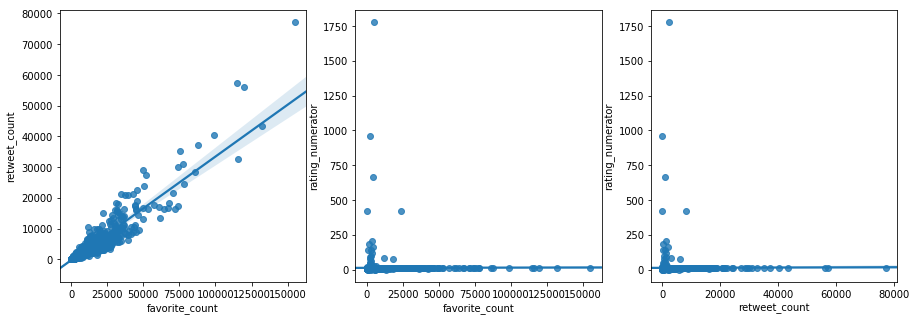

In [640]:
plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
sb.regplot(x = tweet_data_clean['favorite_count'], y = tweet_data_clean['retweet_count'])
plt.subplot(1,3,2)
sb.regplot(x = tweet_data_clean['favorite_count'], y = tweet_data_clean['rating_numerator'])
plt.subplot(1,3,3)
sb.regplot(x = tweet_data_clean['retweet_count'], y = tweet_data_clean['rating_numerator']);

In [641]:
tweet_data_clean[['retweet_count', 'favorite_count', 'rating_numerator']].corr()

,retweet_count,favorite_count,rating_numerator
retweet_count,1.000000,0.927611,0.005180
favorite_count,0.927611,1.000000,0.004043
rating_numerator,0.005180,0.004043,1.000000


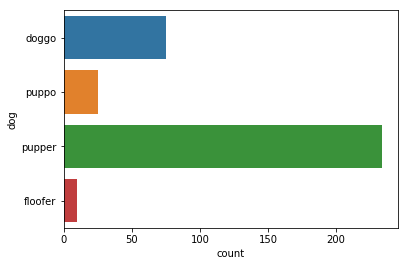

In [642]:
sb.countplot(data = tweet_data_clean,y = 'dog');

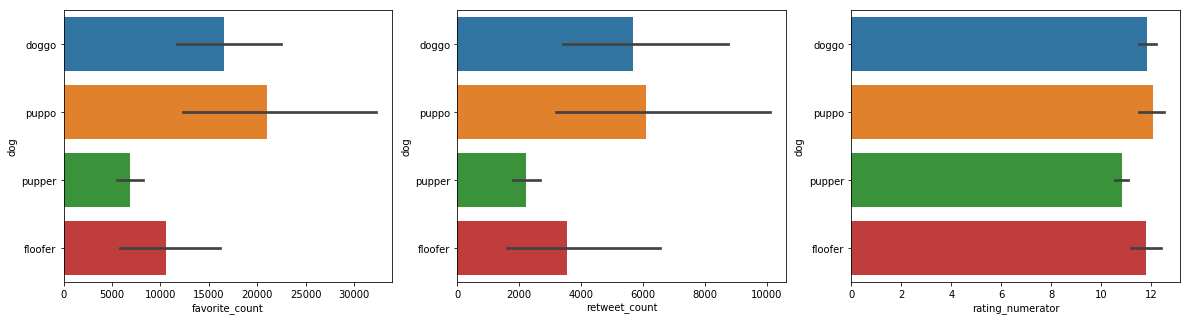

In [643]:
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sb.barplot(data = tweet_data_clean, y = 'dog', x = 'favorite_count')
plt.subplot(1,3,2)
sb.barplot(data = tweet_data_clean, y = 'dog', x = 'retweet_count')
plt.subplot(1,3,3)
sb.barplot(data = tweet_data_clean, y = 'dog', x = 'rating_numerator');

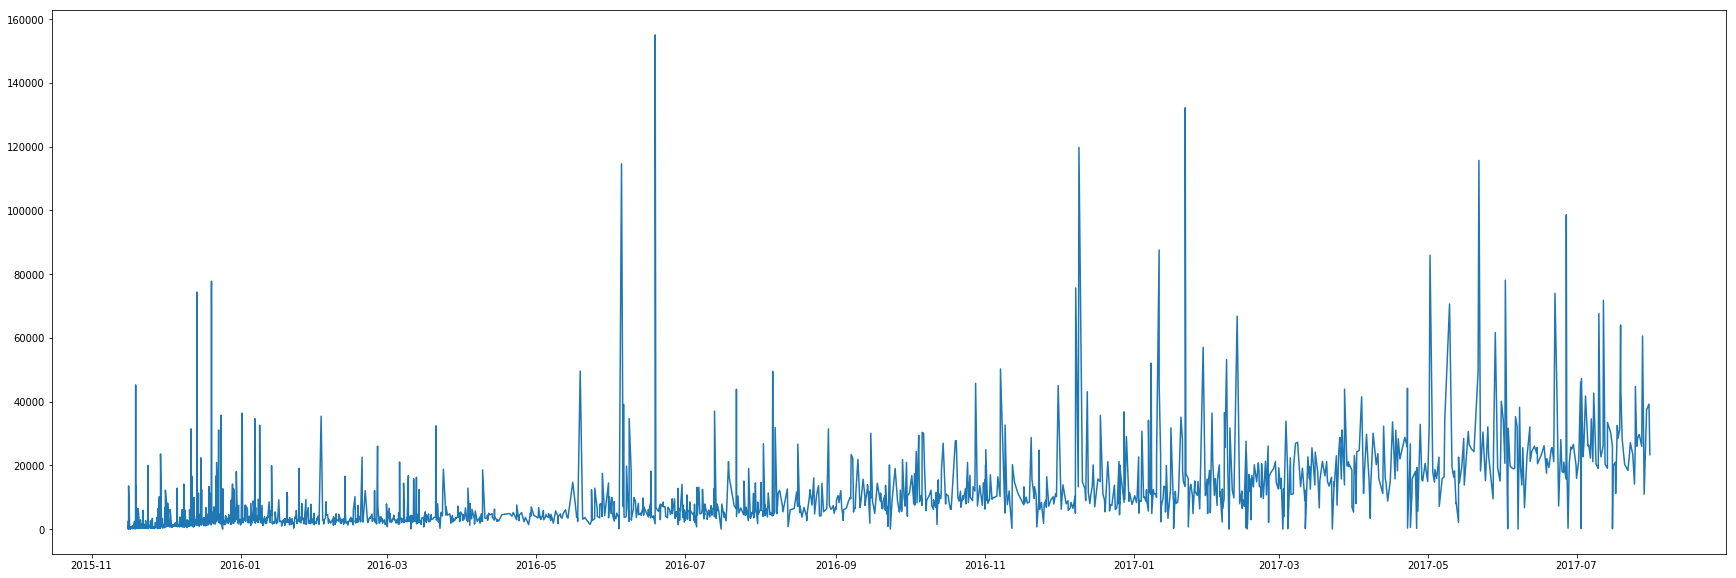

In [644]:
plt.figure(figsize = [30,10])
plt.plot(tweet_data_clean['timestamp'], tweet_data_clean['favorite_count']);

In [724]:
date = tweet_data_clean.groupby([tweet_data_clean['timestamp'].map(lambda x: x.year),tweet_data_clean['timestamp'].map(lambda x: x.month)])['favorite_count'].mean()


In [725]:
date = date.reset_index(level=1)
date = date.rename(columns={'timestamp':'Month'})
date = date.reset_index()
date = date.rename(columns={'timestamp':'Year'})

In [726]:
time = date["Year"].astype(str)+'-'+date["Month"].astype(str)
date['Year'] = pd.to_datetime(time)
date

,Year,Month,favorite_count
0,2015-11-01,11,1162.243333
1,2015-12-01,12,3219.500000
2,2016-01-01,1,3715.896907
3,2016-02-01,2,3779.112000
4,2016-03-01,3,4171.522059
5,2016-04-01,4,4300.233333
6,2016-05-01,5,5762.683333
7,2016-06-01,6,9350.000000
8,2016-07-01,7,6759.577320
9,2016-08-01,8,9055.793651


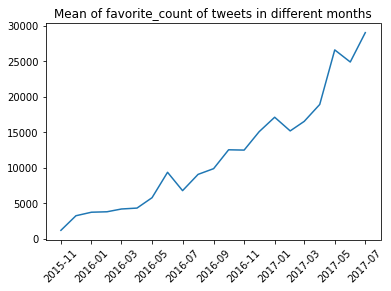

In [728]:
plt.plot(date['Year'], date['favorite_count'])
plt.title('Mean of favorite_count of tweets in different months')
plt.xticks(rotation = 45);

In [748]:
posts = tweet_data_clean.groupby([tweet_data_clean['timestamp'].map(lambda x: x.year),tweet_data_clean['timestamp'].map(lambda x: x.month)])
posts = posts['timestamp'].nunique()

In [753]:
post = pd.DataFrame()
post['Date'] = date['Year']
post['tweet_numbers'] = posts.values
post.head()

,Date,tweet_numbers
0,2015-11-01,300
1,2015-12-01,388
2,2016-01-01,194
3,2016-02-01,125
4,2016-03-01,136


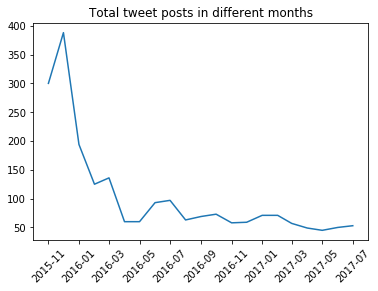

In [755]:
plt.plot(post['Date'], post['tweet_numbers'])
plt.title('Total tweet posts in different months')
plt.xticks(rotation = 45);